## Imports

In [1]:
#pip install import-ipynb
#!pip install dill


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation.IPython_display import display_animation
# import gym
import scipy.stats as stats
from scipy.stats import norm
from collections import namedtuple
import statistics
import time
import os
from collections import deque
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

import yfinance as yf
import datetime as dt

import pickle
import dill


##Importing environment classes

import import_ipynb
import Generate_Data
import Environment

/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

Index(['LogReturn', 'RSI2', 'MA10', 'MA30', 'MA200', 'EMA10', 'EMA30',
       'EMA200', 'ROC10', 'ROC30', 'MOM10', 'MOM30', '%K10', '%D10', '%K30',
       '%D30', 'VIX', 'RiskFreeRate', 'Volume', 'Adj Close', 'Close', 'High',
       'Low', 'Open', 'delta', 'gamma', 'theta', 'vega', 'rho', 'vol',
       'OptionPrice'],
      dtype='object')
(3242, 31)
(440, 31)
(3242, 8)
(440, 8)
(3242, 10)
(440, 10)


<string>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
<string>:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


## Loading Existing Models

Episode 0/1000, Total Reward: -23294.586578269806, P&L: -365.94270374260924, Std Dev P&L: nan
Episode 100/1000, Total Reward: -893.832243744877, P&L: 29.529614591870896, Std Dev P&L: 149.74563869645993
Episode 200/1000, Total Reward: -53489.69196846533, P&L: 202.02439174215476, Std Dev P&L: 262.52078478419116
Episode 300/1000, Total Reward: -34438.08808207469, P&L: 277.27701062745916, Std Dev P&L: 190.27425684978036
Episode 400/1000, Total Reward: -35840.047183799084, P&L: -371.776409731809, Std Dev P&L: 173.57811578880484
Episode 500/1000, Total Reward: -922.6987573688696, P&L: -155.17946237536722, Std Dev P&L: 182.06629835463892
Episode 600/1000, Total Reward: -779.5169374246757, P&L: -22.661451883536827, Std Dev P&L: 130.07199098490688
Episode 700/1000, Total Reward: -129.11677550125998, P&L: 60.51056158974896, Std Dev P&L: 202.06199108282854
Episode 800/1000, Total Reward: -188.27168907499004, P&L: 51.695081578961414, Std Dev P&L: 125.64077709982979
Episode 900/1000, Total Reward: 

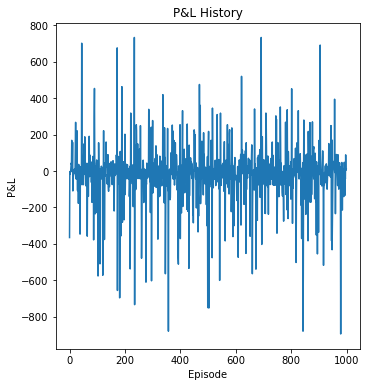

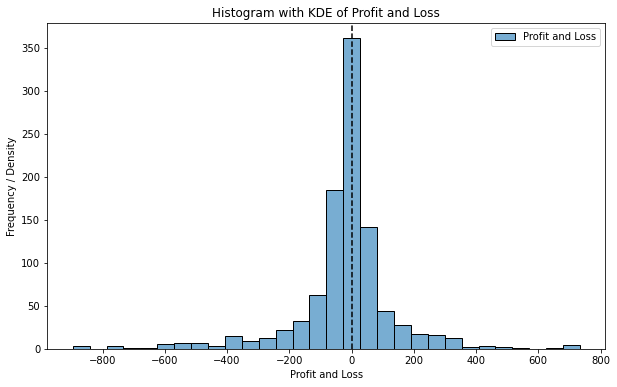

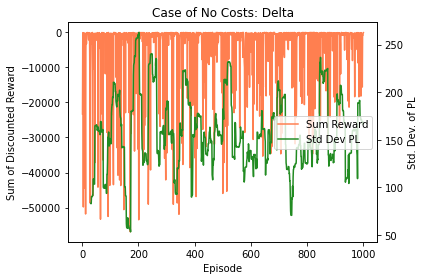

In [3]:
import Delta_Baseline

# Load the agent using dill
with open("models/trained_delta_agent.pkl", "rb") as f:
    delta_agent = dill.load(f)

Episode 0/1000, Total Reward: -23262.82907294849, P&L: -334.1851984212866, Std Dev P&L: nan


<string>:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)


Episode 100/1000, Total Reward: -887.2779868812765, P&L: 36.77355109652396, Std Dev P&L: 151.43205662126394
Episode 200/1000, Total Reward: -53513.09607181329, P&L: 173.43569472677905, Std Dev P&L: 253.246514511035
Episode 300/1000, Total Reward: -34400.36404232931, P&L: 328.2067819238996, Std Dev P&L: 187.42136215075678
Episode 400/1000, Total Reward: -35816.41421635473, P&L: -336.513108560372, Std Dev P&L: 169.15831433530866
Episode 500/1000, Total Reward: -921.9490327363133, P&L: -153.9430661599148, Std Dev P&L: 188.22771967832338
Episode 600/1000, Total Reward: -779.0015045553022, P&L: -21.721989977635104, Std Dev P&L: 128.88265553296597
Episode 700/1000, Total Reward: -126.09550756170414, P&L: 66.59677930717282, Std Dev P&L: 205.122834700811
Episode 800/1000, Total Reward: -184.23522675792847, P&L: 60.681990113804915, Std Dev P&L: 126.66395959037129
Episode 900/1000, Total Reward: -1764.4717548891047, P&L: 26.85968368613114, Std Dev P&L: 143.63479745039936


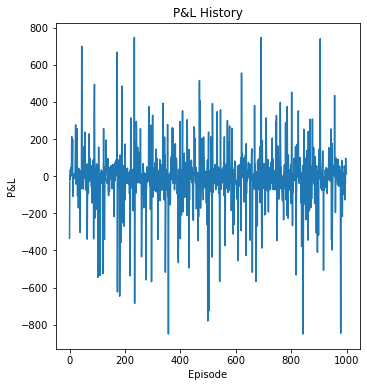

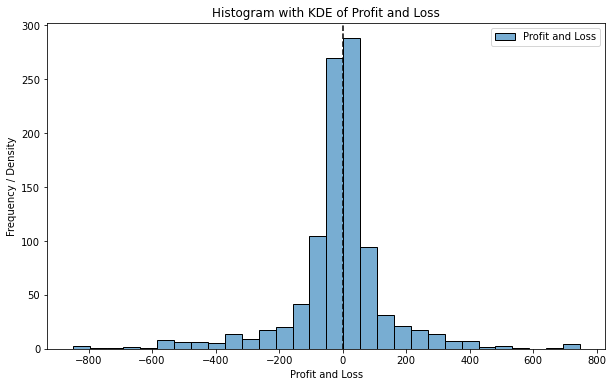

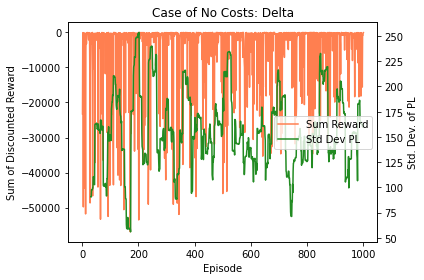

In [4]:
import DQN

# Load the agent using dill
with open("models/dqn_trained_agent.pkl", "rb") as f:
    dqn_agent = dill.load(f)


Episode 0/1000, Total Reward: -23851.384655552476, P&L: -922.7407810252765, Std Dev P&L: nan
Episode 100/1000, Total Reward: -1123.3061746417457, P&L: -224.0909894649738, Std Dev P&L: 370.6060379106769
Episode 200/1000, Total Reward: -54817.29556003051, P&L: -1419.6765669102585, Std Dev P&L: 561.6624739713966
Episode 300/1000, Total Reward: -35150.87127661478, P&L: -685.0240930427485, Std Dev P&L: 383.74201909794743
Episode 400/1000, Total Reward: -36273.24922394455, P&L: -1018.167263766115, Std Dev P&L: 323.34659172268397
Episode 500/1000, Total Reward: -1178.2993478761641, P&L: -576.6990297571266, Std Dev P&L: 454.7005085546276
Episode 600/1000, Total Reward: -992.067773569058, P&L: -410.0706092932158, Std Dev P&L: 344.7046374436723
Episode 700/1000, Total Reward: -184.39848872372986, P&L: -50.85213420399503, Std Dev P&L: 464.89599754767136
Episode 800/1000, Total Reward: -258.60977397624237, P&L: -104.90787563228709, Std Dev P&L: 277.56355004730807
Episode 900/1000, Total Reward: -1

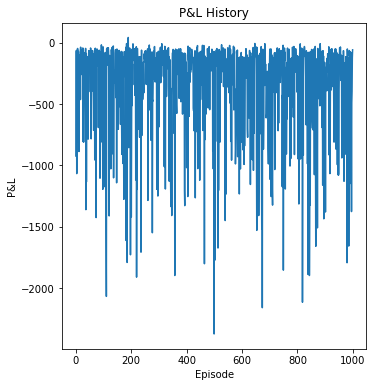

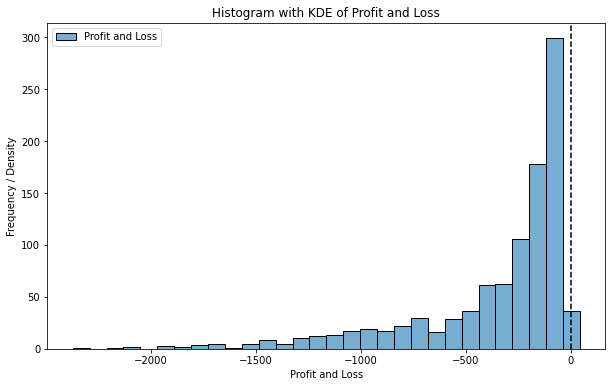

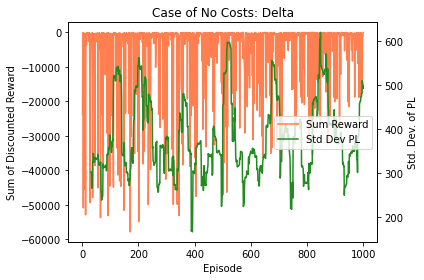

In [5]:
import DDPG

# Load the agent using dill
with open("models/ddpg_agent_full.pkl", "rb") as f:
    ddpg_agent = dill.load(f)

## Testing Suite

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

def test_agent(env, agent, num_episodes, num_steps):
    """
    Test the trained agent in the given environment using unseen data.
    
    Parameters:
    - env: Testing environment with unseen data.
    - agent: The trained agent.
    - num_episodes: Number of episodes to test.
    - num_steps: Number of steps per episode.
    
    Returns:
    - pl_history: List of P&L values for each episode.
    - reward_history: List of total rewards for each episode.
    - std_pl_history: List of standard deviation of P&L over the last 30 episodes, starting from episode 30.
    """
    pl_history = []
    std_pl_history = []
    
    # Initialize a list to keep track of the last 30 P&L values
    last_30_pl = []
    
    for episode in range(1, num_episodes + 1):
        state = env.reset()
        
        total_reward = 0
        pl = []

        for step in range(num_steps):
            # Get the action from the trained agent (greedy policy, no exploration)
            action = agent.get_action(state, step=step, episode=episode)

            # Step in the environment
            next_state, reward, done, pv = env.step(action)

            # Accumulate reward
            total_reward += reward
            pl.append(pv)

            if done:
                break
            else:
                state = next_state

        # Calculate total P&L for the episode
        episode_pl = sum(pl)
        pl_history.append(episode_pl)
        
        # Update the moving window of the last 30 P&L values
        last_30_pl.append(episode_pl)
        if len(last_30_pl) > 30:
            # Remove the oldest P&L value to maintain the window size
            last_30_pl.pop(0)
        
        # Compute the standard deviation only if we've completed at least 30 episodes
        if episode >= 30:
            std = np.std(last_30_pl)
            std_pl_history.append(std)
        else:
            # Append NaN or any other placeholder for the initial episodes
            std_pl_history.append(np.nan)

        # Optional: Print progress every 100 episodes
        if episode % 100 == 0 or episode == 1:
            print(f"Episode {episode}/{num_episodes} completed.")

    return pl_history, std_pl_history


In [7]:
##Getting test datasets
features_test = Generate_Data.features_test
df_stock_test = Generate_Data.df_stock_test
call_options_test = Generate_Data.call_options_test

#Set up your environment with real AAPL stock and option data
env_test = Environment.Environment(
    stock_data=df_stock_test,
    option_data=call_options_test,
    features_data=features_test,
    T=30,
    n_steps=30,
    num_sold_opt=100,
    kappa=0.1,
    alpha=0.001
)

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


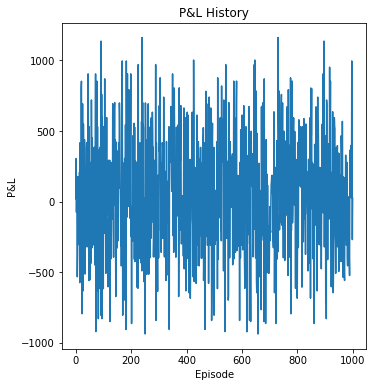

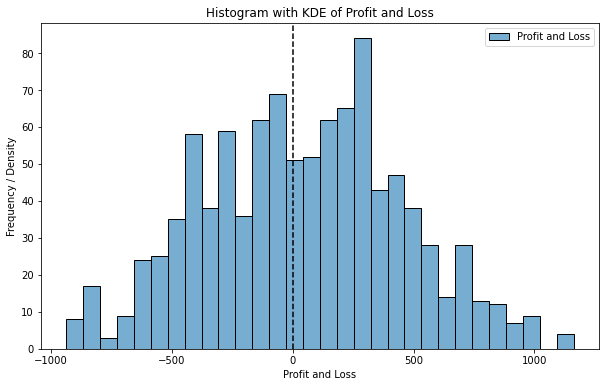

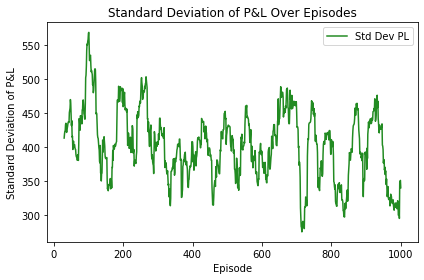

In [8]:
# Test the agent
pl_history_delta, std_pl_delta = test_agent(env_test, delta_agent, num_episodes=1000, num_steps=30)
episodes = np.array(list(range(1, len(pl_history_delta) + 1)))

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_delta)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_delta, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_delta, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


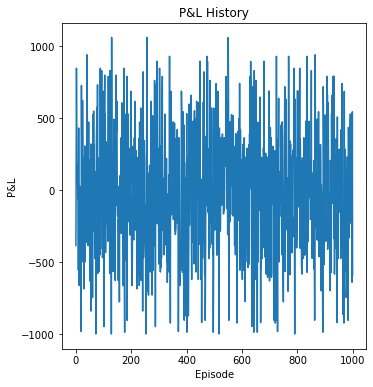

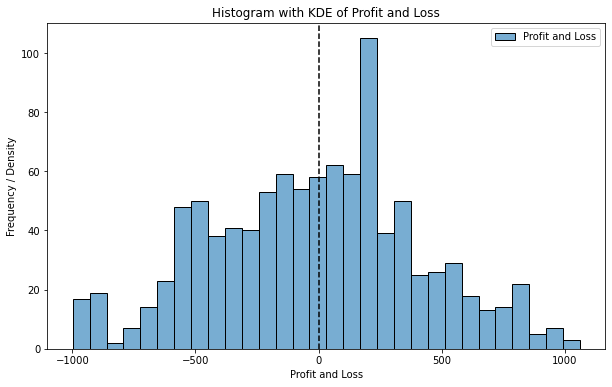

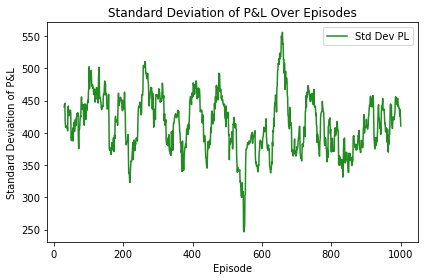

In [9]:
# Test the agent
pl_history_dqn, std_pl_dqn = test_agent(env_test, dqn_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_dqn)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_dqn, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_dqn, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


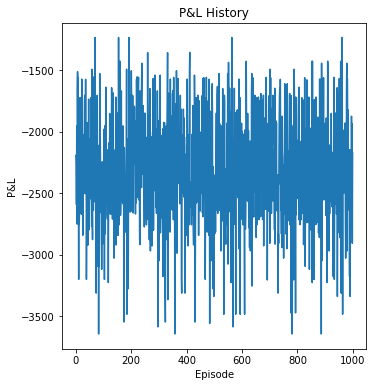

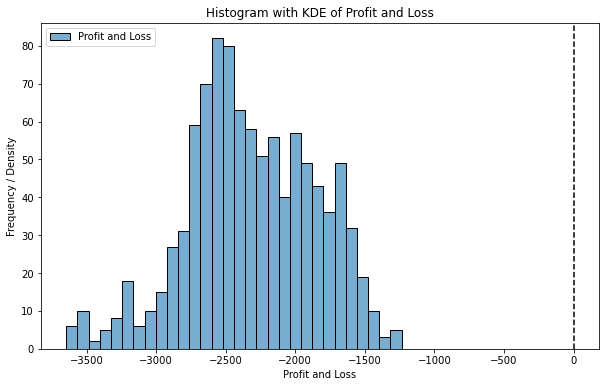

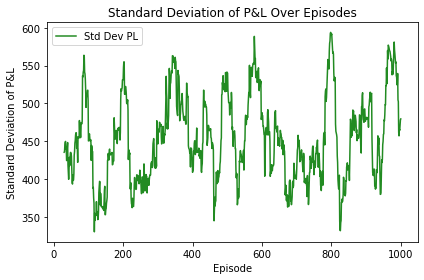

In [10]:
# Test the agent
pl_history_ddpg, std_pl_ddpg = test_agent(env_test, ddpg_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_ddpg)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_ddpg, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()


plt.show()

## Combining

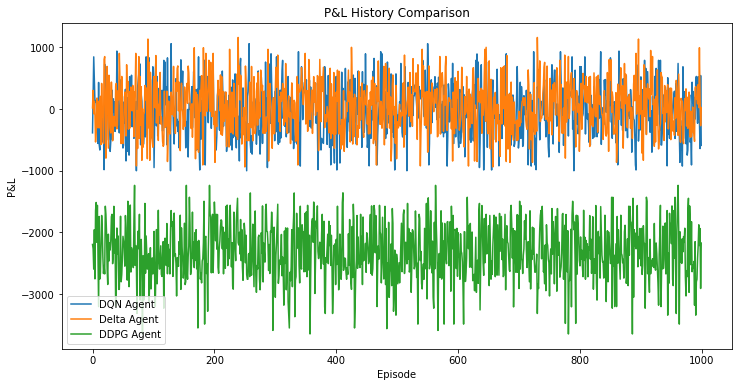

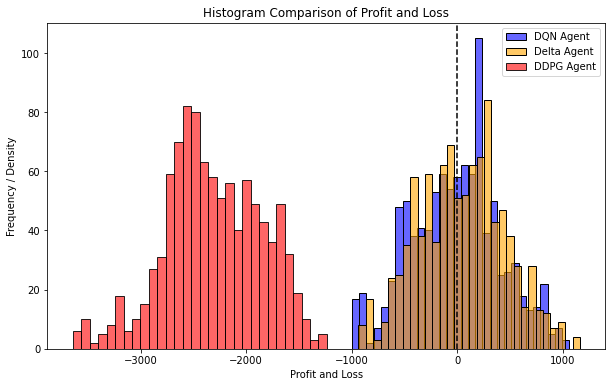

In [11]:
# Plot P&L history comparison
plt.figure(figsize=(12, 6))

# Line plot of P&L histories
plt.plot(pl_history_dqn, label="DQN Agent")
plt.plot(pl_history_delta, label="Delta Agent")
plt.plot(pl_history_ddpg, label="DDPG Agent")

plt.title("P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("P&L")
plt.legend()
plt.show()

# Histogram comparison
plt.figure(figsize=(10, 6))

sns.histplot(pl_history_dqn, kde=False, bins=30, label="DQN Agent", color="blue", alpha=0.6)
sns.histplot(pl_history_delta, kde=False, bins=30, label="Delta Agent", color="orange", alpha=0.6)
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="DDPG Agent", color="red", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram Comparison of Profit and Loss")
plt.legend()
plt.show()

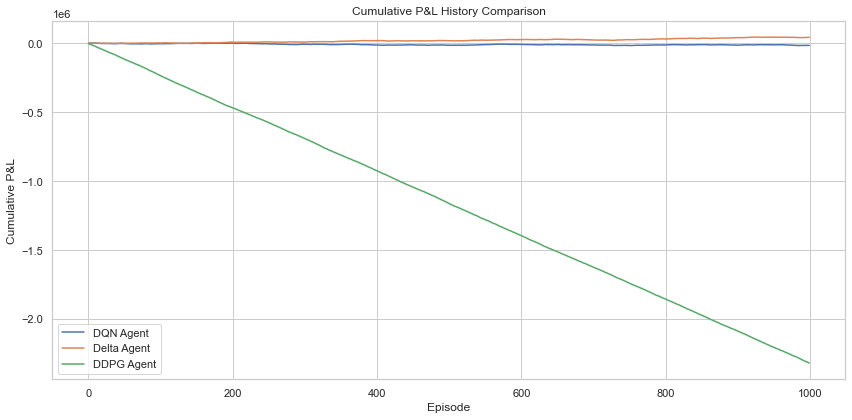

In [15]:
cum_pl_dqn = np.cumsum(pl_history_dqn)
cum_pl_delta = np.cumsum(pl_history_delta)
cum_pl_ddpg = np.cumsum(pl_history_ddpg)

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(cum_pl_dqn, label="DQN Agent")
plt.plot(cum_pl_delta, label="Delta Agent")
plt.plot(cum_pl_ddpg, label="DDPG Agent")

plt.title("Cumulative P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

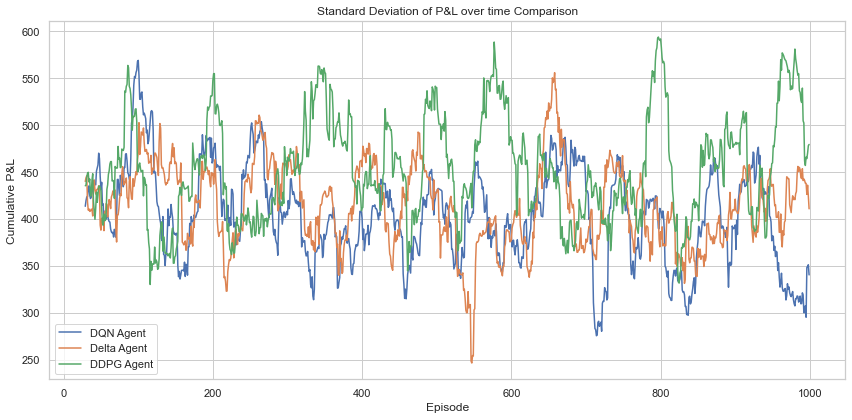

In [16]:
# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(std_pl_delta, label="DQN Agent")
plt.plot(std_pl_dqn, label="Delta Agent")
plt.plot(std_pl_ddpg, label="DDPG Agent")

plt.title("Standard Deviation of P&L over time Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
def print_pnl_stats(pl_history, name):
    mean_pnl = np.mean(pl_history)
    std_dev_pnl = np.std(pl_history)
    percentile_1_pnl = np.percentile(pl_history, 1)

    print(f"\n{name} PNL Statistics:")
    print(f"{'Mean PNL':<25}: {mean_pnl:.2f}")
    print(f"{'Standard Deviation of PNL':<25}: {std_dev_pnl:.2f}")
    print(f"{'1st Percentile of PNL':<25}: {percentile_1_pnl:.2f}")

# Assuming pl_history_delta, pl_history_dqn, and pl_history_ddpg are defined
print_pnl_stats(pl_history_delta, "Delta")
print_pnl_stats(pl_history_dqn, "DQN")
print_pnl_stats(pl_history_ddpg, "DDPG")


Delta PNL Statistics:
Mean PNL                 : 43.00
Standard Deviation of PNL: 412.12
1st Percentile of PNL    : -862.98

DQN PNL Statistics:
Mean PNL                 : -15.68
Standard Deviation of PNL: 424.12
1st Percentile of PNL    : -986.51

DDPG PNL Statistics:
Mean PNL                 : -2319.68
Standard Deviation of PNL: 465.36
1st Percentile of PNL    : -3486.19
